In [1]:
import numpy as np
import scipy 
import skimage
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

In [56]:
import time

In [2]:
from matplotlib.patches import Circle
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()

In [9]:
def image_convert(filename):
    img= cv2.imread("./part2_images/"+filename +".jpg")
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)/255
    return gray_img

In [36]:
from scipy.ndimage.filters import gaussian_laplace
#the filter width should be odd
# filtering the image (two implementations)
# one that increases filter size, and one that downsamples the image
# For timing, use time.time()
def increase_filter(img):
    ## initial scale is sigma
    h,w = img.shape
    scale_space=np.zeros((h,w,n))
    for i in range(n):
        sigmai=  sigma*k**i
        space = sigmai**2*gaussian_laplace(img,sigmai)
        scale_space[:,:,i]= space**2
        
    return scale_space


In [32]:
def findmax(scale_space):
    h,w,n = scale_space.shape
    print(h,w,n)
    nms_2d = np.zeros((h,w,n))
    nms_3d = np.zeros((h,w,n))
    for i in range(n):
        ## NMS
        nms_2d[:,:,i] = scipy.ndimage.rank_filter(scale_space[:,:,i],-1,(3,3))
        
    for i in range(h):
        for j in range(w):
            max_val = np.max(nms_2d[i,j,:])
            max_idx = np.argmax(nms_2d[i,j,:])
            nms_3d[i,j,max_idx] = max_val
    ##eliminate 
            if nms_3d[i,j,max_idx]!=scale_space[i,j,max_idx]:
                 nms_3d[i,j,max_idx] = 0
    cx= []
    cy= []
    r = []
    for i in range(n):
        cx.append(list(np.where(nms_3d[:,:,i] > threshold)[1]))
        cy.append(list(np.where(nms_3d[:,:,i] > threshold)[0]))
        r.append([np.sqrt(2)*sigma*k**i]*len(cx[i]))
    cx = np.concatenate(cx)
    cy = np.concatenate(cy)
    r = np.concatenate(r)  
    return cx,cy,r
            
            
        
    

356 493 10
Time for butterfly is 1.1099660396575928


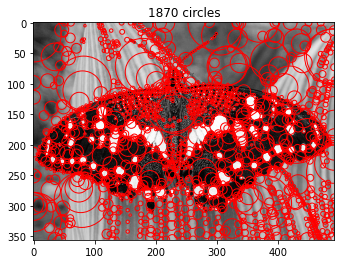

480 640 10
Time for einstein is 1.8473379611968994


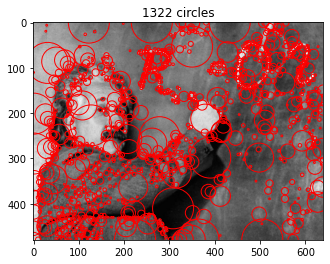

335 500 10
Time for fishes is 1.0170660018920898


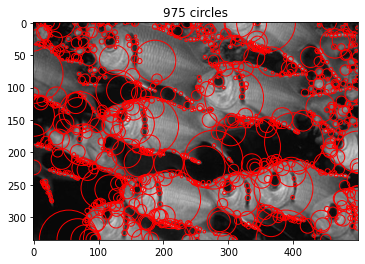

357 328 10
Time for sunflowers is 0.7151257991790771


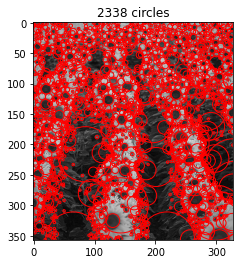

In [58]:
sigma = np.sqrt(2)
k = np.sqrt(2)
n = 10
threshold = 0.003
filenames=["butterfly","einstein","fishes","sunflowers"]
for filename in filenames:
    img = image_convert(filename)
    start= time.time()
    scale_space = increase_filter(img)
    cx,cy,radius = findmax(scale_space)
    end = time.time()
    print("Time for",filename,"is",end-start)
    show_all_circles(img,cx,cy,radius)

In [52]:
from skimage import transform
def downsample(img):
    h,w=img.shape
    scale_space=np.zeros((h,w,n))
    for i in range(n):
        
        dim = (np.round(h/(k**i)),np.round(w/(k**i)))
        img_r = transform.resize(img,dim,mode = 'reflect')
        space = gaussian_laplace(img_r,sigma)**2
        scale_space[:,:,i] = transform.resize(space,(h,w) ,mode = 'reflect')
        
    return scale_space

In [53]:
img= image_convert("butterfly")
sp = downsample(img)
sp.shape

(356, 493, 10)

In [38]:
def findmax_ds():
    h,w,n = scale_space.shape
    print(h,w,n)
    nms_2d = np.zeros((h,w,n))
    nms_3d = np.zeros((h,w,n))
    for i in range(n):
        ## NMS
        nms_2d[:,:,i] = scipy.ndimage.rank_filter(scale_space[:,:,i],-1,(3,3))
        
    for i in range(h):
        for j in range(w):
            max_val = np.max(nms_2d[i,j,:])
            max_idx = np.argmax(nms_2d[i,j,:])
            nms_3d[i,j,max_idx] = max_val
    ##eliminate 
            if nms_3d[i,j,max_idx]!=scale_space[i,j,max_idx]:
                 nms_3d[i,j,max_idx] = 0
    cx= []
    cy= []
    r = []
    for i in range(n):
        cx.append(list(np.where(nms_3d[:,:,i] > threshold)[1]))
        cy.append(list(np.where(nms_3d[:,:,i] > threshold)[0]))
        r.append([np.sqrt(2)*sigma*k**i]*len(cx[i]))
    cx = np.concatenate(cx)
    cy = np.concatenate(cy)
    r = np.concatenate(r)  
    return cx,cy,r
    

In [39]:
np.round(1/np.sqrt(2))

1.0

356 493 10
Time for butterfly is 1.0067989826202393


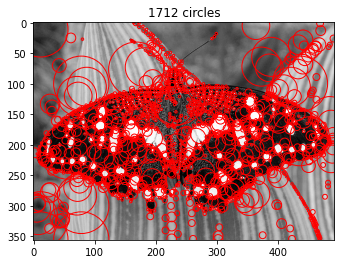

480 640 10
Time for einstein is 1.6967668533325195


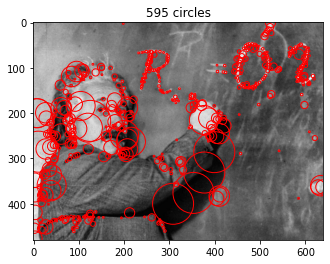

335 500 10
Time for fishes is 0.9319448471069336


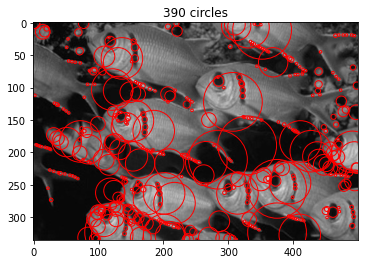

357 328 10
Time for sunflowers is 0.6534790992736816


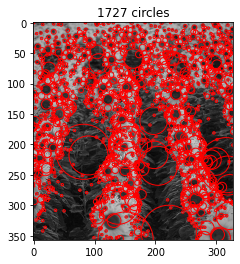

In [67]:
sigma = np.sqrt(2)
k = np.sqrt(2)
n = 10
threshold = 0.003
filenames=["butterfly","einstein","fishes","sunflowers"]
for filename in filenames:
    img = image_convert(filename)
    start= time.time()
    scale_space = downsample(img)
    cx,cy,radius = findmax(scale_space)
    end = time.time()
    print("Time for",filename,"is",end-start)
    show_all_circles(img,cx,cy,radius)

334 375 15
Time for 00125v is 1.7019331455230713


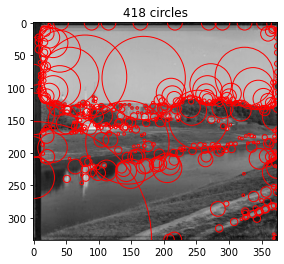

336 377 15
Time for 00398v is 1.7026357650756836


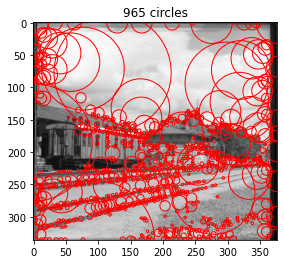

334 376 15
Time for 01112v is 1.673543930053711


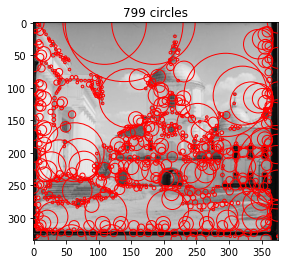

333 375 15
Time for 00153v is 1.662567138671875


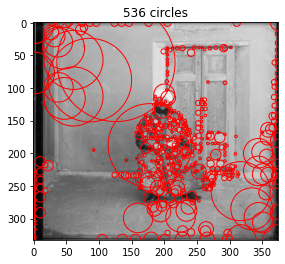

In [68]:
sigma = np.sqrt(2)
k = np.sqrt(2)
n = 15
threshold = 0.003
filenames=["00125v","00398v","01112v","00153v"]
for filename in filenames:
    img = image_convert(filename)
    start= time.time()
    scale_space = increase_filter(img)
    cx,cy,radius = findmax(scale_space)
    end = time.time()
    print("Time for",filename,"is",end-start)
    show_all_circles(img,cx,cy,radius)

334 375 15
Time for 00125v is 0.9012129306793213


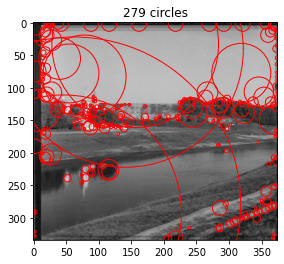

336 377 15
Time for 00398v is 0.8767781257629395


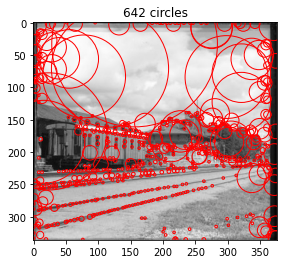

334 376 15
Time for 01112v is 0.8739368915557861


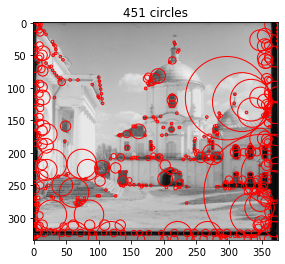

333 375 15
Time for 00153v is 0.8712050914764404


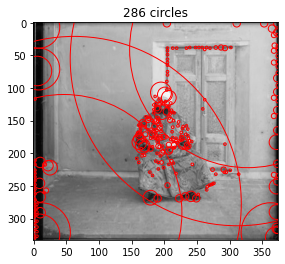

In [69]:
sigma = np.sqrt(2)
k = np.sqrt(2)
n = 15
threshold = 0.003
filenames=["00125v","00398v","01112v","00153v"]
for filename in filenames:
    img = image_convert(filename)
    start= time.time()
    scale_space = downsample(img)
    cx,cy,radius = findmax(scale_space)
    end = time.time()
    print("Time for",filename,"is",end-start)
    show_all_circles(img,cx,cy,radius)